##### @Time    : 2019/4/4 22:09
##### @Author  : ChanLiang
##### @Github  ：https://github.com/ChanLiang

# iris数据集—perceptron

## 一. 首先制作一个线性可分的数据集

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

先看看iris里啥样？

In [2]:
iris = load_iris()
#iris

乱七八糟的！头疼，还好知道里边有哪几个东西，我们把它搞成一个DataFrame吧~~~

In [3]:
# 注意：在做hstack时，合并双方的维度必须相同，所以做一个reshape
df = pd.DataFrame(np.hstack((iris.data, iris.target.reshape(150, 1))), columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'])
df.head(6)
#df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0


这里我们只取前两列特征，而且只取前两类数据（前100行）

In [6]:
# 其实前边也可以不用转成df, 直接用np的二维数组也可以
X, Y = df.values[:100, [0, 1]], df.values[:100, -1]
assert len(X) == len(Y)
Y = np.array([1 if y == 1 else -1 for y in Y]).reshape(100, 1)   # 很关键！一档要将标签变为-1/1,如果是0/1喂进去会死循环...
print (X.shape)
print (Y.shape)

(100, 2)
(100, 1)


那么这个问题变成了一个定义在二维特征空间上的一个二分类问题。<br>
要想用感知机来做，首先，我们需要看看这么取能不能保证数据是线性可分的，不妨画个散点图看看

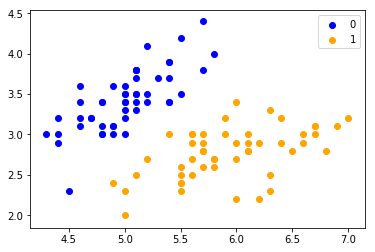

In [7]:
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], color='orange', label='1')
plt.legend()
plt.show()

很容易看出，数据是线性可分的，下面我们用之前写好的perceptron来进行分类

## 二. 使用perceptron分类

直接把perceptron.py中的代码拷贝过来使用

In [8]:
class Perceptron(object):
    def __init__(self, X, Y):
        # 初始化参数w,b
        self.w = np.zeros((len(X[0]), 1))  # w和样本x维度相同,注意要用列向量，不要用rank=1的array
        self.b = 0
        self.X, self.Y = X, Y

    def train(self):
        loop = True
        step = 0.01
        i = 0
        while loop and i < 1000:  # 不断重复，直到训练集中没有误分类的点为止
            i += 1
            loop = False
            for i in range(len(self.X)):
                x, y = self.X[i].reshape((len(self.X[i]), 1)), self.Y[i]
                # 每次选取一个误分点x，梯度下降更新参数w,b，直到模型能将x分对为止
                while y * (np.dot(self.w.T, x) + self.b) <= 0:
                    self.w += step * y * x
                    self.b += step * y
                    loop = True

    def predict(self, x):
        if np.dot(self.w, x) + self.b > 0:
            return 1
        else:
            return -1

用自制训练集来训练感知机模型

In [9]:
model = Perceptron(X, Y)
model.train()

训练好了之后画出分割超平面，看看是否能够将两类点完全分开

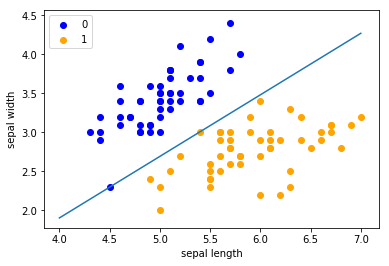

In [13]:
# 返回区间[4,7]之间的10个元素的等差数列
# 【注意】这里（x1, x2）就相当于（x, y）！
x_points = np.linspace(4,7,2)
y_ = -(model.w[0] * x_points +model.b)/model.w[1]
plt.plot(x_points, y_)

plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

可以看到，两类点已经被完全划分开了！